# Molecular Analysis with RDKit and SELFIES

Chemistry with Python

In [ ]:
# Library Imports:

In [ ]:
# Adds a specific directory to the system path to access installed libraries.

In [1]:
import sys
sys.path.append('/user/local/lib/python3.11/site-packages/')

In [ ]:
# Imports RDKit, a popular cheminformatics library used for molecule representation and manipulation.
# numpy is imported for handling numerical arrays.

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit WARNING: [16:33:05] Enabling RDKit 2019.09.3 jupyter extensions


In [ ]:
# Defining Molecule Structures:

# MolFromSmiles converts a SMILES string into a molecular object.
# cluster1 and cluster2 correspond to gold (Au) clusters from different research papers.

In [3]:
# cluster1 is the structure from paper 2021
# cluster2 is the structure from JACS 2013


cluster1 = Chem.MolFromSmiles('[Au]12[S@@]([Au][S@]([Au]3[Au]4567[Au]89%10[Au]%1114([Au]158([Au@]6([S@]([Au]1[S@]([Au]%11[S@@]2C)C)C)[S@]([Au][S@]3C)C)[S@]([Au][S@]([Au]%10[S@@]9C)C)C)[S@@]([Au]1=[Au]([S@@]7C)[S@]1C)C)C)C	')
cluster2 = Chem.MolFromSmiles('[Au]12345[Au]67([Au]891[Au]1[S@@]([Au]%10%11%12([Au]([S@@]9C)[S@]([Au]%10[S@]([Au]%11[S@@]([Au]478%12)C)C)C)[S@@]([Au]3[S@]([Au]2[S@@]([Au]6[S@]1C)C)C)C)C)[S@@]([Au][S@@]([Au]1=[Au]([S@]1C)[S@@]5C)C)C')

In [ ]:
# Processing Multiple Molecules: 
# Converts a list of SMILES strings into molecule objects and stores them in mol_list.
# Creates a grid image showing the structures of the molecules.

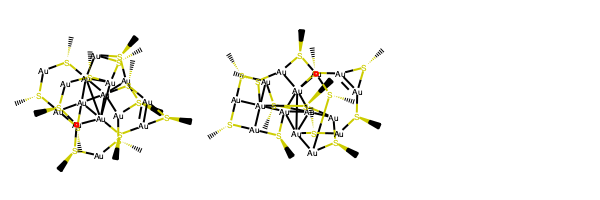

In [4]:
# The first structure belongs to paper published on 2021, and the second to the JACS paper published on 2013 by De-en Jiang


smiles_list = ['[Au]12[S@@]([Au][S@]([Au]3[Au]4567[Au]89%10[Au]%1114([Au]158([Au@]6([S@]([Au]1[S@]([Au]%11[S@@]2C)C)C)[S@]([Au][S@]3C)C)[S@]([Au][S@]([Au]%10[S@@]9C)C)C)[S@@]([Au]1=[Au]([S@@]7C)[S@]1C)C)C)C	', '[Au]12345[Au]67([Au]891[Au]1[S@@]([Au]%10%11%12([Au]([S@@]9C)[S@]([Au]%10[S@]([Au]%11[S@@]([Au]478%12)C)C)C)[S@@]([Au]3[S@]([Au]2[S@@]([Au]6[S@]1C)C)C)C)C)[S@@]([Au][S@@]([Au]1=[Au]([S@]1C)[S@@]5C)C)C']
mol_list = []

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
#    img = Draw.MolsToGridImage(mol_list, molsPerRow = 4)
img = Draw.MolsToGridImage(mol_list)
img

In [ ]:
# Substructure Matching:

# Defines a substructure pattern using SMARTS (a more general representation than SMILES).
# Checks if each molecule contains a substructure that matches the defined pattern (here a 5-membered ring).

In [5]:
#pattern = Chem.MolFromSmiles ('C(=O)O')
pattern = Chem.MolFromSmiles ('S')     # Which structure has a S atom
pattern = Chem.MolFromSmarts ('[r5]')  # Smarts is a generalization of Smiles # Which structure has a ring of 5 atoms

for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

True
True


# Fingerprints

In [ ]:
# Computing Morgan Fingerprints:

# Morgan fingerprints are computed for cluster1 and cluster2. These are circular fingerprints representing molecular structure features.
# bi holds information on the bits turned on by specific atom environments
# Converts the fingerprint into a NumPy array and identifies the non-zero (activated) bits.

In [6]:
bi = {}

fp = AllChem.GetMorganFingerprintAsBitVect (cluster1, 2, nBits = 1024, bitInfo = bi)  # number 2 means how many bonds I want to specify here
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 53,
 71,
 129,
 185,
 202,
 210,
 231,
 291,
 310,
 327,
 335,
 338,
 344,
 378,
 385,
 391,
 396,
 473,
 474,
 501,
 540,
 574,
 577,
 620,
 674,
 716,
 723,
 755,
 756,
 760,
 779,
 781,
 786,
 841,
 847,
 936,
 957,
 987,
 999,
 1002,
 1003,
 1005,
 1014,
 1017]

In [ ]:
# Visualizing Morgan Fingerprint Bits:
# Visualizes the bits (atom environments) that are active in the Morgan fingerprint.

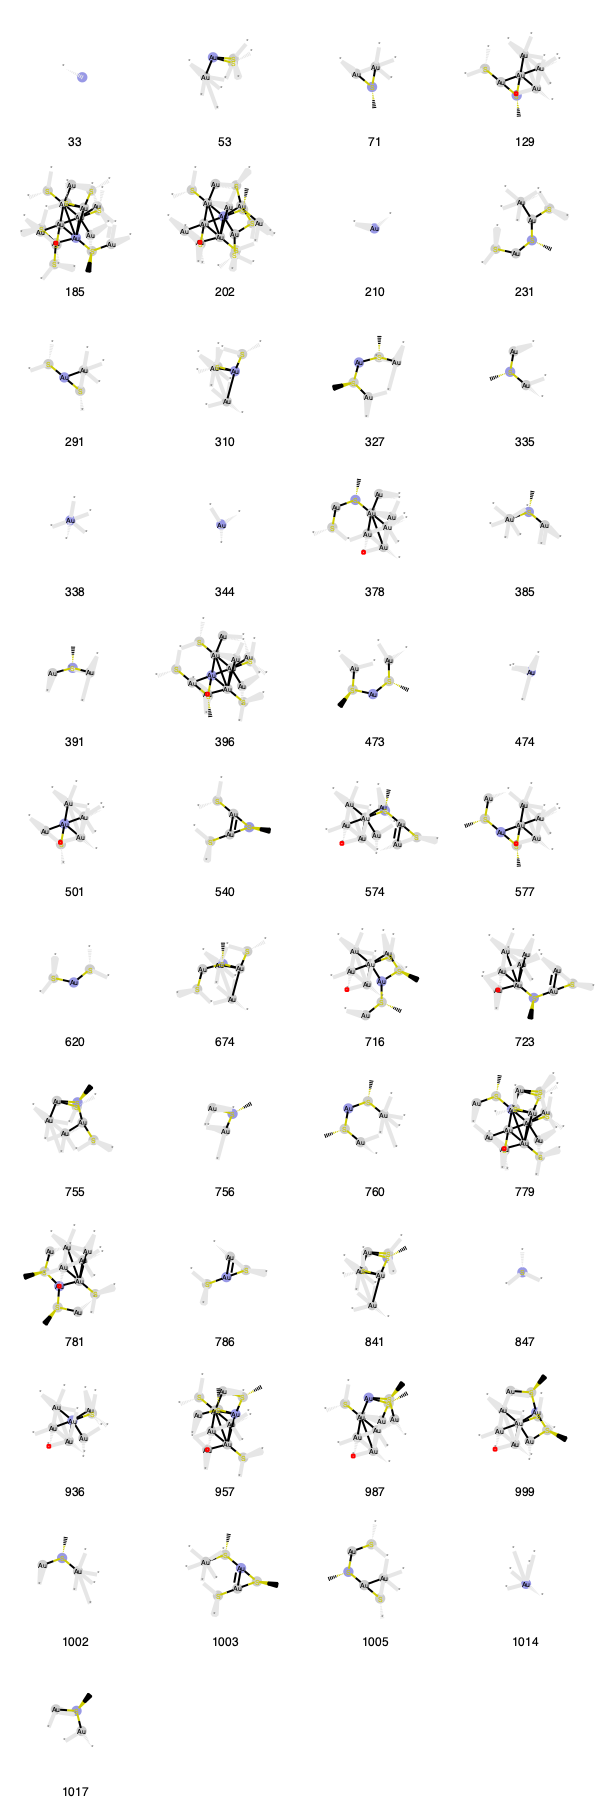

In [7]:
prints = [(cluster1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow = 4, legends = [str(x) for x in fp.GetOnBits()])

In [8]:
bi = {}

fp2 = AllChem.GetMorganFingerprintAsBitVect (cluster2, 2, nBits = 1024, bitInfo = bi)  # number 2 means how many bonds I want to specify here
fp2_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2,fp2_arr)
np.nonzero(fp2_arr)
list(fp2.GetOnBits())

[33,
 37,
 49,
 53,
 71,
 111,
 181,
 210,
 263,
 271,
 291,
 335,
 338,
 344,
 350,
 378,
 385,
 416,
 447,
 450,
 476,
 540,
 620,
 685,
 711,
 720,
 748,
 755,
 763,
 775,
 786,
 797,
 816,
 836,
 846,
 847,
 868,
 933,
 958,
 974,
 1003,
 1014,
 1015,
 1017]

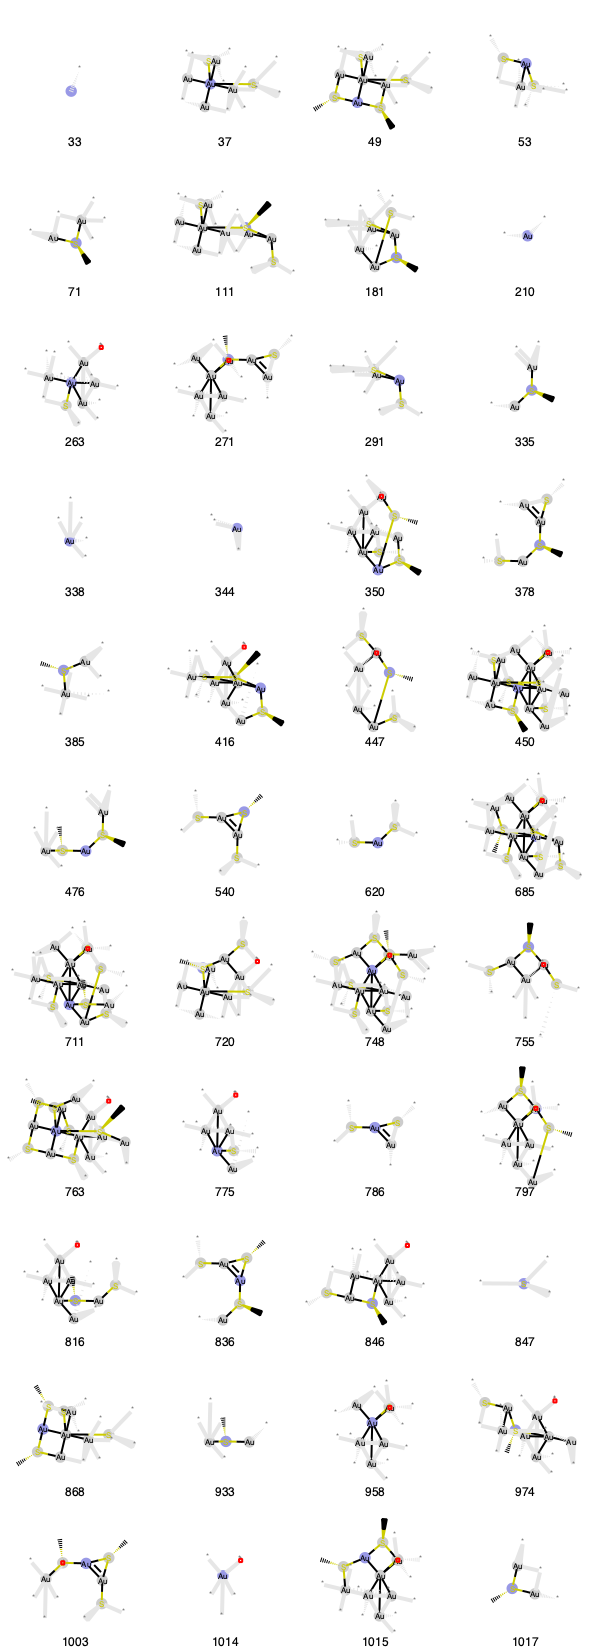

In [9]:
prints2 = [(cluster2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints2, molsPerRow = 4, legends = [str(x) for x in fp2.GetOnBits()])

# Similarity comparison and Tanimoto coefficient

Tanimoto coefficient: Two structures are usually considered similar if Tanimoto coefficient > 0.85

In [ ]:
# Tanimoto Similarity:
# Compares the fingerprints of cluster1 and cluster2 to compute Tanimoto similarity, 
# a measure of the structural similarity between the two molecules.

In [10]:
#fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits = 1024, bitInfo = bi)

print('cluster_1', list(fp.GetOnBits()))

print('cluster_2', list(fp2.GetOnBits()))

common = set(fp.GetOnBits()) & set(fp2.GetOnBits())
combined = set(fp.GetOnBits()) | set(fp2.GetOnBits())
print(common)
print(combined)
print( len(common)/ len(combined))
print(DataStructs.TanimotoSimilarity(fp,fp2))

cluster_1 [33, 53, 71, 129, 185, 202, 210, 231, 291, 310, 327, 335, 338, 344, 378, 385, 391, 396, 473, 474, 501, 540, 574, 577, 620, 674, 716, 723, 755, 756, 760, 779, 781, 786, 841, 847, 936, 957, 987, 999, 1002, 1003, 1005, 1014, 1017]
cluster_2 [33, 37, 49, 53, 71, 111, 181, 210, 263, 271, 291, 335, 338, 344, 350, 378, 385, 416, 447, 450, 476, 540, 620, 685, 711, 720, 748, 755, 763, 775, 786, 797, 816, 836, 846, 847, 868, 933, 958, 974, 1003, 1014, 1015, 1017]
{385, 33, 291, 71, 1003, 620, 335, 847, 786, 210, 338, 53, 755, 1014, 344, 1017, 378, 540}
{263, 775, 779, 781, 271, 786, 540, 797, 33, 291, 37, 816, 49, 53, 310, 574, 577, 836, 71, 327, 841, 846, 335, 847, 338, 344, 350, 868, 620, 111, 378, 129, 385, 391, 396, 416, 674, 933, 936, 685, 181, 185, 957, 958, 447, 450, 711, 202, 716, 974, 720, 210, 723, 473, 474, 987, 476, 231, 999, 1002, 1003, 748, 1005, 755, 756, 501, 1014, 1015, 760, 1017, 763}
0.2535211267605634
0.2535211267605634


# Translation between SMILES and SELFIES representations

In [ ]:
# Converting SMILES to SELFIES:
# SELFIES is a machine-readable molecular representation. The code converts SMILES to SELFIES and back to SMILES,
# ensuring structural consistency.

In [11]:
import selfies as sf

In [12]:
# cluster1 is the structure from paper 2021
cluster1 = "[Au]12[S@@]([Au][S@]([Au]3[Au]4567[Au]89%10[Au]%1114([Au]158([Au@]6([S@]([Au]1[S@]([Au]%11[S@@]2C)C)C)[S@]([Au][S@]3C)C)[S@]([Au][S@]([Au]%10[S@@]9C)C)C)[S@@]([Au]1=[Au]([S@@]7C)[S@]1C)C)C)C"

In [13]:
# SMILES -> SELFIES -> SMILES translation
try:
    cluster1_sf = sf.encoder(cluster1)  
    cluster1_smi = sf.decoder(cluster1_sf) 
except sf.EncoderError:
    pass  # sf.encoder error!
except sf.DecoderError:
    pass  # sf.decoder error!



In [14]:
print(cluster1_sf)

[Au][S@@][Branch2][#Branch1][=C][Au][S@][Branch2][#Branch1][Branch2][Au][Au][Au][Au][Ring1][Branch2][Ring1][Ring1][Branch2][Branch1][N][Au][Ring1][Ring2][Ring1][Ring1][Branch2][Ring2][C][Au@][Ring1][Branch1][Branch2][Ring1][Ring1][S@][Branch1][#C][Au][Ring1][Ring2][S@][Branch1][Branch2][Au][Ring1][#Branch1][S@@][Ring1][#C][C][C][C][S@][Branch1][=Branch1][Au][S@][Ring1][P][C][C][S@][Branch1][#C][Au][S@][Branch1][#Branch2][Au][Ring2][Ring1][Branch1][S@@][Ring2][Ring1][=Branch1][C][C][C][S@@][Branch1][=C][Au][=Au][Branch1][=Branch1][S@@][Ring2][Ring1][=C][C][S@][Ring1][Branch1][C][C][C][C]


In [15]:
print(cluster1_smi)

[Au]12[S@@]([Au][S@]([Au]3[Au]4567[Au]89%10[Au]14%11([Au]58%12([Au@]6([S@]([Au]%12[S@]([Au]%11[S@@]2C)C)C)[S@]([Au][S@]3C)C)[S@]([Au][S@]([Au]9[S@@]%10C)C)C)[S@@]([Au]%13=[Au]([S@@]7C)[S@]%13C)C)C)C


In [ ]:
# Measures the length of the SELFIES string and splits it into individual symbols for detailed analysis.

In [16]:
len_cluster1 = sf.len_selfies(cluster1_sf)  

symbols_cluster1 = list(sf.split_selfies(cluster1_sf))

In [17]:
print(symbols_cluster1)

['[Au]', '[S@@]', '[Branch2]', '[#Branch1]', '[=C]', '[Au]', '[S@]', '[Branch2]', '[#Branch1]', '[Branch2]', '[Au]', '[Au]', '[Au]', '[Au]', '[Ring1]', '[Branch2]', '[Ring1]', '[Ring1]', '[Branch2]', '[Branch1]', '[N]', '[Au]', '[Ring1]', '[Ring2]', '[Ring1]', '[Ring1]', '[Branch2]', '[Ring2]', '[C]', '[Au@]', '[Ring1]', '[Branch1]', '[Branch2]', '[Ring1]', '[Ring1]', '[S@]', '[Branch1]', '[#C]', '[Au]', '[Ring1]', '[Ring2]', '[S@]', '[Branch1]', '[Branch2]', '[Au]', '[Ring1]', '[#Branch1]', '[S@@]', '[Ring1]', '[#C]', '[C]', '[C]', '[C]', '[S@]', '[Branch1]', '[=Branch1]', '[Au]', '[S@]', '[Ring1]', '[P]', '[C]', '[C]', '[S@]', '[Branch1]', '[#C]', '[Au]', '[S@]', '[Branch1]', '[#Branch2]', '[Au]', '[Ring2]', '[Ring1]', '[Branch1]', '[S@@]', '[Ring2]', '[Ring1]', '[=Branch1]', '[C]', '[C]', '[C]', '[S@@]', '[Branch1]', '[=C]', '[Au]', '[=Au]', '[Branch1]', '[=Branch1]', '[S@@]', '[Ring2]', '[Ring1]', '[=C]', '[C]', '[S@]', '[Ring1]', '[Branch1]', '[C]', '[C]', '[C]', '[C]']


# Random structures 

Generation from symbols_cluster1

In [19]:
import random
alphabet=sf.get_semantic_robust_alphabet() # Gets the alphabet of robust symbols
rnd_selfies=''.join(random.sample(list(symbols_cluster1), 69))
rnd_smiles=sf.decoder(rnd_selfies)
print(rnd_smiles)

[Au]1[Au]=C[Au][S@@][Au]([Au]2CC21)CN=[Au@]3(=P)[S@][S@@]=C4C3=CC(C4(C)C)[S@]


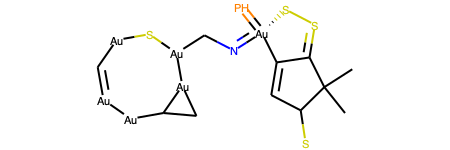

In [20]:
structure = Chem.MolFromSmiles('[Au]1[Au]=C[Au][S@@][Au]([Au]2CC21)CN=[Au@]3(=P)[S@][S@@]=C4C3=CC(C4(C)C)[S@]')
structure

In [21]:
structure.GetNumAtoms()

23

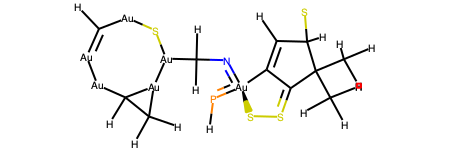

In [22]:
structure_with_hydrogens = Chem.AddHs(structure)
structure_with_hydrogens

In [23]:
structure_with_hydrogens.GetNumAtoms()

38

# Working on generation of random structures

In [24]:
alphabet=sf.get_semantic_robust_alphabet() # Gets the alphabet of robust symbols
rnd_selfies=''.join(random.sample(list(symbols_cluster1), 89))
rnd_smiles=sf.decoder(rnd_selfies)
print(rnd_smiles)

[Au]12C[S@][S@]3#CC[S@]4=C=C[S@]1([Au]34(#CC56)[S@@]5[S@@]6)[Au]C[Au]7[Au][Au]7[Au]([Au][S@])[S@@]([Au]CP8)([S@@][Au]9C8=[Au]%10)[S@][Au]29[Au@]%10


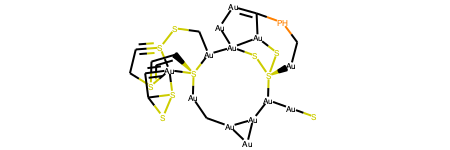

In [25]:
struct = Chem.MolFromSmiles('[Au]12C[S@][S@]3#CC[S@]4=C=C[S@]1([Au]34(#CC56)[S@@]5[S@@]6)[Au]C[Au]7[Au][Au]7[Au]([Au][S@])[S@@]([Au]CP8)([S@@][Au]9C8=[Au]%10)[S@][Au]29[Au@]%10')
struct

In [26]:
struct.GetNumAtoms()

34

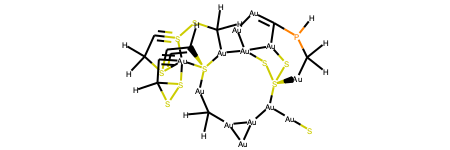

In [27]:
struct_with_hydrogens = Chem.AddHs(struct)
struct_with_hydrogens

In [28]:
struct_with_hydrogens.GetNumAtoms()

45

# STONED-SELFIES

Generative Models

In [ ]:
# This part of the code is for generating random molecular structures and evaluating them using different molecular fingerprints (e.g., AtomPair, Pharmacophore, etc.). The randomize_smiles function generates a random SMILES string from a molecule, while sanitize_smiles ensures valid canonical SMILES.
# The _FingerprintCalculator class calculates different types of fingerprints (AtomPair, ECFP4, etc.).

In [29]:
import time 
import selfies
import rdkit
import random
import numpy as np
import random
from rdkit import Chem
from selfies import encoder, decoder
from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Chem import Mol
from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint, GetBTFingerprint
from rdkit.Chem.Pharm2D import Generate, Gobbi_Pharm2D
from rdkit.Chem import Draw

from rdkit.Chem import MolToSmiles as mol2smi
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

def randomize_smiles(mol):
    '''Returns a random (dearomatized) SMILES given an rdkit mol object of a molecule.
    Parameters:
    mol (rdkit.Chem.rdchem.Mol) :  RdKit mol object (None if invalid smile string smi)
    
    Returns:
    mol (rdkit.Chem.rdchem.Mol) : RdKit mol object  (None if invalid smile string smi)
    '''
    if not mol:
        return None

    Chem.Kekulize(mol)
    return rdkit.Chem.MolToSmiles(mol, canonical=False, doRandom=True, isomericSmiles=False,  kekuleSmiles=True) 


def sanitize_smiles(smi):
    '''Return a canonical smile representation of smi
    
    Parameters:
    smi (string) : smile string to be canonicalized 
    
    Returns:
    mol (rdkit.Chem.rdchem.Mol) : RdKit mol object                          (None if invalid smile string smi)
    smi_canon (string)          : Canonicalized smile representation of smi (None if invalid smile string smi)
    conversion_successful (bool): True/False to indicate if conversion was  successful 
    '''
    try:
        mol = smi2mol(smi, sanitize=True)
        smi_canon = mol2smi(mol, isomericSmiles=False, canonical=True)
        return (mol, smi_canon, True)
    except:
        return (None, None, False)
    

def get_selfie_chars(selfie):
    '''Obtain a list of all selfie characters in string selfie
    
    Parameters: 
    selfie (string) : A selfie string - representing a molecule 
    
    Example: 
    >>> get_selfie_chars('[C][=C][C][=C][C][=C][Ring1][Branch1_1]')
    ['[C]', '[=C]', '[C]', '[=C]', '[C]', '[=C]', '[Ring1]', '[Branch1_1]']
    
    Returns:
    chars_selfie: list of selfie characters present in molecule selfie
    '''
    chars_selfie = [] # A list of all SELFIE sybols from string selfie
    while selfie != '':
        chars_selfie.append(selfie[selfie.find('['): selfie.find(']')+1])
        selfie = selfie[selfie.find(']')+1:]
    return chars_selfie


class _FingerprintCalculator:
    ''' Calculate the fingerprint for a molecule, given the fingerprint type
    Parameters: 
        mol (rdkit.Chem.rdchem.Mol) : RdKit mol object (None if invalid smile string smi)
        fp_type (string)            :Fingerprint type  (choices: AP/PHCO/BPF,BTF,PAT,ECFP4,ECFP6,FCFP4,FCFP6)  
    Returns:
        RDKit fingerprint object
    '''

    def get_fingerprint(self, mol: Mol, fp_type: str):
        method_name = 'get_' + fp_type
        method = getattr(self, method_name)
        if method is None:
            raise Exception(f'{fp_type} is not a supported fingerprint type.')
        return method(mol)

    def get_AP(self, mol: Mol):
        return AllChem.GetAtomPairFingerprint(mol, maxLength=10)

    def get_PHCO(self, mol: Mol):
        return Generate.Gen2DFingerprint(mol, Gobbi_Pharm2D.factory)

    def get_BPF(self, mol: Mol):
        return GetBPFingerprint(mol)

    def get_BTF(self, mol: Mol):
        return GetBTFingerprint(mol)

    def get_PATH(self, mol: Mol):
        return AllChem.RDKFingerprint(mol)

    def get_ECFP4(self, mol: Mol):
        return AllChem.GetMorganFingerprint(mol, 2)

    def get_ECFP6(self, mol: Mol):
        return AllChem.GetMorganFingerprint(mol, 3)

    def get_FCFP4(self, mol: Mol):
        return AllChem.GetMorganFingerprint(mol, 2, useFeatures=True)

    def get_FCFP6(self, mol: Mol):
        return AllChem.GetMorganFingerprint(mol, 3, useFeatures=True)


def get_fingerprint(mol: Mol, fp_type: str):
    ''' Fingerprint getter method. Fingerprint is returned after using object of 
        class '_FingerprintCalculator'
        
    Parameters: 
        mol (rdkit.Chem.rdchem.Mol) : RdKit mol object (None if invalid smile string smi)
        fp_type (string)            :Fingerprint type  (choices: AP/PHCO/BPF,BTF,PAT,ECFP4,ECFP6,FCFP4,FCFP6)  
    Returns:
        RDKit fingerprint object
        
    '''
    return _FingerprintCalculator().get_fingerprint(mol=mol, fp_type=fp_type)

def mutate_selfie(selfie, max_molecules_len, write_fail_cases=False):
    '''Return a mutated selfie string (only one mutation on slefie is performed)
    
    Mutations are done until a valid molecule is obtained 
    Rules of mutation: With a 33.3% propbabily, either: 
        1. Add a random SELFIE character in the string
        2. Replace a random SELFIE character with another
        3. Delete a random character
    
    Parameters:
    selfie            (string)  : SELFIE string to be mutated 
    max_molecules_len (int)     : Mutations of SELFIE string are allowed up to this length
    write_fail_cases  (bool)    : If true, failed mutations are recorded in "selfie_failure_cases.txt"
    
    Returns:
    selfie_mutated    (string)  : Mutated SELFIE string
    smiles_canon      (string)  : canonical smile of mutated SELFIE string
    '''
    valid=False
    fail_counter = 0
    chars_selfie = get_selfie_chars(selfie)
    
    while not valid:
        fail_counter += 1
                
        alphabet = list(selfies.get_semantic_robust_alphabet()) # 34 SELFIE characters 

        choice_ls = [1, 2, 3] # 1=Insert; 2=Replace; 3=Delete
        random_choice = np.random.choice(choice_ls, 1)[0]
        
        # Insert a character in a Random Location
        if random_choice == 1: 
            random_index = np.random.randint(len(chars_selfie)+1)
            random_character = np.random.choice(alphabet, size=1)[0]
            
            selfie_mutated_chars = chars_selfie[:random_index] + [random_character] + chars_selfie[random_index:]

        # Replace a random character 
        elif random_choice == 2:                         
            random_index = np.random.randint(len(chars_selfie))
            random_character = np.random.choice(alphabet, size=1)[0]
            if random_index == 0:
                selfie_mutated_chars = [random_character] + chars_selfie[random_index+1:]
            else:
                selfie_mutated_chars = chars_selfie[:random_index] + [random_character] + chars_selfie[random_index+1:]
                
        # Delete a random character
        elif random_choice == 3: 
            random_index = np.random.randint(len(chars_selfie))
            if random_index == 0:
                selfie_mutated_chars = chars_selfie[random_index+1:]
            else:
                selfie_mutated_chars = chars_selfie[:random_index] + chars_selfie[random_index+1:]
                
        else: 
            raise Exception('Invalid Operation trying to be performed')

        selfie_mutated = "".join(x for x in selfie_mutated_chars)
        sf = "".join(x for x in chars_selfie)
        
        try:
            smiles = decoder(selfie_mutated)
            mol, smiles_canon, done = sanitize_smiles(smiles)
            if len(selfie_mutated_chars) > max_molecules_len or smiles_canon=="":
                done = False
            if done:
                valid = True
            else:
                valid = False
        except:
            valid=False
            if fail_counter > 1 and write_fail_cases == True:
                f = open("selfie_failure_cases.txt", "a+")
                f.write('Tried to mutate SELFIE: '+str(sf)+' To Obtain: '+str(selfie_mutated) + '\n')
                f.close()
    
    return (selfie_mutated, smiles_canon)

def get_mutated_SELFIES(selfies_ls, num_mutations): 
    ''' Mutate all the SELFIES in 'selfies_ls' 'num_mutations' number of times. 
    
    Parameters:
    selfies_ls   (list)  : A list of SELFIES 
    num_mutations (int)  : number of mutations to perform on each SELFIES within 'selfies_ls'
    
    Returns:
    selfies_ls   (list)  : A list of mutated SELFIES
    
    '''
    for _ in range(num_mutations): 
        selfie_ls_mut_ls = []
        for str_ in selfies_ls: 
            
            str_chars = get_selfie_chars(str_)
            max_molecules_len = len(str_chars) + num_mutations
            
            selfie_mutated, _ = mutate_selfie(str_, max_molecules_len)
            selfie_ls_mut_ls.append(selfie_mutated)
        
        selfies_ls = selfie_ls_mut_ls.copy()
    return selfies_ls


def get_fp_scores(smiles_back, target_smi, fp_type): 
    '''Calculate the Tanimoto fingerprint (using fp_type fingerint) similarity between a list 
       of SMILES and a known target structure (target_smi). 
       
    Parameters:
    smiles_back   (list) : A list of valid SMILES strings 
    target_smi (string)  : A valid SMILES string. Each smile in 'smiles_back' will be compared to this stucture
    fp_type (string)     : Type of fingerprint  (choices: AP/PHCO/BPF,BTF,PAT,ECFP4,ECFP6,FCFP4,FCFP6) 
    
    Returns: 
    smiles_back_scores (list of floats) : List of fingerprint similarities
    '''
    smiles_back_scores = []
    target    = Chem.MolFromSmiles(target_smi)

    fp_target = get_fingerprint(target, fp_type)

    for item in smiles_back: 
        mol    = Chem.MolFromSmiles(item)
        fp_mol = get_fingerprint(mol, fp_type)
        score  = TanimotoSimilarity(fp_mol, fp_target)
        smiles_back_scores.append(score)
    return smiles_back_scores

In [30]:
#smi     = 'CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F'   # Celecoxib
#fp_type = 'ECFP4'


smi  = '[Au]12[S@@]([Au][S@]([Au]3[Au]4567[Au]89%10[Au]14%11([Au]58%12([Au@]6([S@]([Au]%12[S@]([Au]%11[S@@]2C)C)C)[S@]([Au][S@]3C)C)[S@]([Au][S@]([Au]9[S@@]%10C)C)C)[S@@]([Au]%13=[Au]([S@@]7C)[S@]%13C)C)C)C'
fp_type = 'ECFP4'


total_time = time.time()
# num_random_samples = 50000 # For a more exhaustive search! 
num_random_samples = 1000     
num_mutation_ls    = [1, 2, 3, 4, 5]

mol = Chem.MolFromSmiles(smi)
if mol == None: 
    raise Exception('Invalid starting structure encountered')

start_time = time.time()
randomized_smile_orderings  = [randomize_smiles(mol) for _ in range(num_random_samples)]

# Convert all the molecules to SELFIES
selfies_ls = [encoder(x) for x in randomized_smile_orderings]
print('Randomized molecules (in SELFIES) time: ', time.time()-start_time)


all_smiles_collect = []
all_smiles_collect_broken = []

start_time = time.time()
for num_mutations in num_mutation_ls: 
    # Mutate the SELFIES: 
    selfies_mut = get_mutated_SELFIES(selfies_ls.copy(), num_mutations=num_mutations)

    # Convert back to SMILES: 
    smiles_back = [decoder(x) for x in selfies_mut]
    all_smiles_collect = all_smiles_collect + smiles_back
    all_smiles_collect_broken.append(smiles_back)


print('Mutation obtainment time (back to smiles): ', time.time()-start_time)


# Work on:  all_smiles_collect
start_time = time.time()
canon_smi_ls = []
for item in all_smiles_collect: 
    mol, smi_canon, did_convert = sanitize_smiles(item)
    if mol == None or smi_canon == '' or did_convert == False: 
        raise Exception('Invalid smile string found')
    canon_smi_ls.append(smi_canon)
canon_smi_ls        = list(set(canon_smi_ls))
print('Unique mutated structure obtainment time: ', time.time()-start_time)

start_time = time.time()
canon_smi_ls_scores = get_fp_scores(canon_smi_ls, target_smi=smi, fp_type=fp_type)
print('Fingerprint calculation time: ', time.time()-start_time)
print('Total time: ', time.time()-total_time)

# Molecules with fingerprint similarity > 0.8
indices_thresh_8 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.8]
mols_8 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_8]

# Molecules with fingerprint similarity > 0.6
indices_thresh_6 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.6 and x < 0.8]
mols_6 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_6]

# Molecules with fingerprint similarity > 0.4
indices_thresh_4 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.4 and x < 0.6]
mols_4 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_4]

Randomized molecules (in SELFIES) time:  1.0572421550750732
Mutation obtainment time (back to smiles):  25.99087429046631
Unique mutated structure obtainment time:  3.092576742172241
Fingerprint calculation time:  2.8542721271514893
Total time:  32.996824979782104


# Visualizing Molecules with Similarity > 0.8

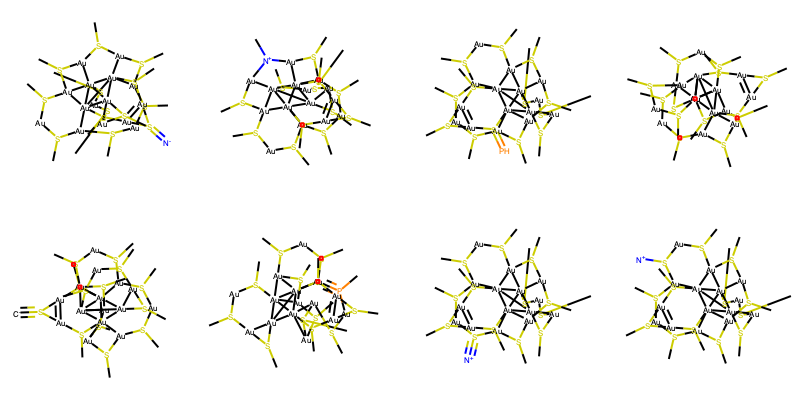

In [31]:
img=Draw.MolsToGridImage(mols_8[:8],molsPerRow=4,subImgSize=(200,200))    
img

In [32]:
#print(mols_8[0])
Chem.MolToSmiles(mols_8[0])

'C[S]1[Au][S](C)[Au]2345[Au]6[S](C)[Au]7[S](C)[Au]8[S](C)[Au][S](C)[Au]9[S](C)[Au][S](C)[Au]2([S]6C)[Au]9326[S](C)[Au]3=[Au]([S](C)[Au]8742[Au]562[S](C)[Au]12)S3=[N-]'

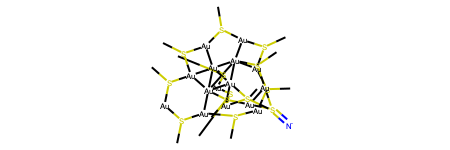

In [33]:
random1 = Chem.MolFromSmiles('C[S]1[Au][S](C)[Au]2345[Au]6[S](C)[Au]7[S](C)[Au]8[S](C)[Au][S](C)[Au]9[S](C)[Au][S](C)[Au]2([S]6C)[Au]9326[S](C)[Au]3=[Au]([S](C)[Au]8742[Au]562[S](C)[Au]12)S3=[N-]')
random1

In [34]:
random1.GetNumAtoms()

41

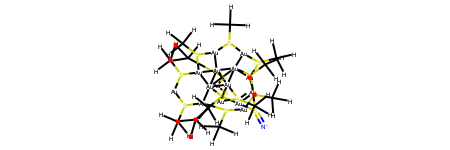

In [35]:
random1_with_hydrogens = Chem.AddHs(random1)
random1_with_hydrogens

In [36]:
random1_with_hydrogens.GetNumAtoms()

77

In [37]:
Chem.MolToSmiles(mols_8[1])

'C[N+]1[Au]2[S](C)[Au]3[S](C)[Au][S](C)[Au]4[S](C)[Au][S](C)[Au]56[S](C)[Au]1[Au]5178[S](C)[Au][S](C)[Au]5[S](C)[Au]519[Au]2371[S](C)[Au]2=[Au]([S]2C)[S](C)[Au]46918'

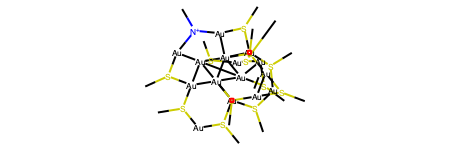

In [38]:
random2 = Chem.MolFromSmiles('C[N+]1[Au]2[S](C)[Au]3[S](C)[Au][S](C)[Au]4[S](C)[Au][S](C)[Au]56[S](C)[Au]1[Au]5178[S](C)[Au][S](C)[Au]5[S](C)[Au]519[Au]2371[S](C)[Au]2=[Au]([S]2C)[S](C)[Au]46918')
random2

In [39]:
random2.GetNumAtoms()

41

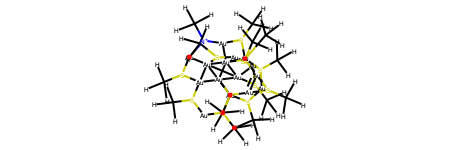

In [40]:
random2_with_hydrogens = Chem.AddHs(random2)
random2_with_hydrogens

In [41]:
random2_with_hydrogens.GetNumAtoms()

80

In [42]:
#### Convert SMILES to SELFIES

In [43]:
#random2 = "C[S]1[Au][S](C)[Au]2345[Au]6[S](C)[Au]7[S](C)[Au]8[S](C)[C+][S](C)[Au]9[S](C)[Au][S](C)[Au]2([S]6C)[Au]9326[S](C)[Au]3=[Au]([S]3C)[S](C)[Au]8742[Au]562[S](C)[Au]12"

In [44]:
#### SMILES -> SELFIES -> SMILES translation

#try:
#    random2_sf = sf.encoder(random2)  
#    random2_smi = sf.decoder(random2_sf) 
#except sf.EncoderError:
#    pass  # sf.encoder error!
#except sf.DecoderError:
#    pass  # sf.decoder error!

In [45]:
#print(random2_sf)

# Visualizing Molecules with Similarity > 0.6 & Less than 0.8

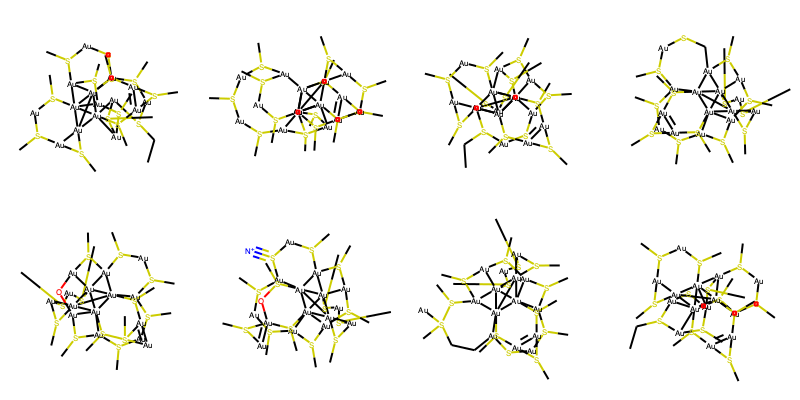

In [46]:
img=Draw.MolsToGridImage(mols_6[:8],molsPerRow=4,subImgSize=(200,200))    
img

# Visualizing Molecules with Similarity > 0.4 Less than 0.6

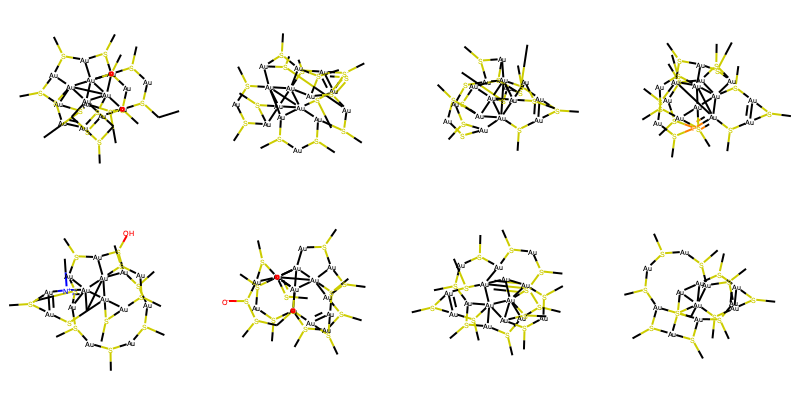

In [47]:
img=Draw.MolsToGridImage(mols_4[:8],molsPerRow=4,subImgSize=(200,200))    
img

In [48]:
# Generating Chemical subspace

# filtering out un-synthetic structures.
# For this example, we make use of SYBA to filter out the most synthetic structures:

In [49]:
#from syba.syba import SybaClassifier
#syba = SybaClassifier()
#syba.fitDefaultScore()

#syba_scores = []
#for item in canon_smi_ls: 
#    syba_scores.append(syba.predict(smi=item))
        
#A = np.argsort(syba_scores)
#smi_arranged = [canon_smi_ls[i] for i in A]
#smi_arranged = smi_arranged[-20:]

#mols_ = [Chem.MolFromSmiles(x) for x in smi_arranged]

#img=Draw.MolsToGridImage(mols_,molsPerRow=4,subImgSize=(200,200))    
#img

# Au4 core

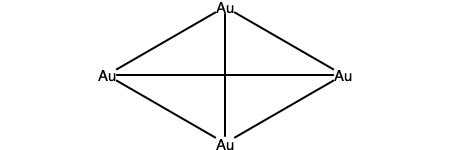

In [50]:
example = Chem.MolFromSmiles('[Au]12[Au]3[Au]1[Au]23	')
example

In [51]:
def substructure_preserver(mol):
    """
    Check for substructure violates
    Return True: contains a substructure violation
    Return False: No substructure violation
    """        
    
  #  if mol.HasSubstructMatch(rdkit.Chem.MolFromSmarts('NS(=O)(=O)c1ccc(-n2cccn2)cc1')) == True:
    if mol.HasSubstructMatch(rdkit.Chem.MolFromSmarts('[Au]12[Au]3[Au]1[Au]23')) == True:
   
    
        return True # The has substructure! 
    else: 
        return False # Molecule does not have substructure!

def mutate_selfie(selfie, max_molecules_len, write_fail_cases=False):
    '''Return a mutated selfie string (only one mutation on slefie is performed)
    
    Mutations are done until a valid molecule is obtained 
    Rules of mutation: With a 33.3% propbabily, either: 
        1. Add a random SELFIE character in the string
        2. Replace a random SELFIE character with another
        3. Delete a random character
    
    Parameters:
    selfie            (string)  : SELFIE string to be mutated 
    max_molecules_len (int)     : Mutations of SELFIE string are allowed up to this length
    write_fail_cases  (bool)    : If true, failed mutations are recorded in "selfie_failure_cases.txt"
    
    Returns:
    selfie_mutated    (string)  : Mutated SELFIE string
    smiles_canon      (string)  : canonical smile of mutated SELFIE string
    '''
    valid=False
    fail_counter = 0
    chars_selfie = get_selfie_chars(selfie)
    
    while not valid:
        fail_counter += 1
                
        alphabet = list(selfies.get_semantic_robust_alphabet()) # 34 SELFIE characters 

        choice_ls = [1, 2, 3] # 1=Insert; 2=Replace; 3=Delete
        random_choice = np.random.choice(choice_ls, 1)[0]
        
        # Insert a character in a Random Location
        if random_choice == 1: 
            random_index = np.random.randint(len(chars_selfie)+1)
            random_character = np.random.choice(alphabet, size=1)[0]
            
            selfie_mutated_chars = chars_selfie[:random_index] + [random_character] + chars_selfie[random_index:]

        # Replace a random character 
        elif random_choice == 2:                         
            random_index = np.random.randint(len(chars_selfie))
            random_character = np.random.choice(alphabet, size=1)[0]
            if random_index == 0:
                selfie_mutated_chars = [random_character] + chars_selfie[random_index+1:]
            else:
                selfie_mutated_chars = chars_selfie[:random_index] + [random_character] + chars_selfie[random_index+1:]
                
        # Delete a random character
        elif random_choice == 3: 
            random_index = np.random.randint(len(chars_selfie))
            if random_index == 0:
                selfie_mutated_chars = chars_selfie[random_index+1:]
            else:
                selfie_mutated_chars = chars_selfie[:random_index] + chars_selfie[random_index+1:]
                
        else: 
            raise Exception('Invalid Operation trying to be performed')

        selfie_mutated = "".join(x for x in selfie_mutated_chars)
        sf = "".join(x for x in chars_selfie)
        
        try:
            smiles = decoder(selfie_mutated)
            mol, smiles_canon, done = sanitize_smiles(smiles)
            if len(selfie_mutated_chars) > max_molecules_len or smiles_canon=="" or substructure_preserver(mol)==False:
                done = False
            if done:
                valid = True
            else:
                valid = False
        except:
            valid=False
            if fail_counter > 1 and write_fail_cases == True:
                f = open("selfie_failure_cases.txt", "a+")
                f.write('Tried to mutate SELFIE: '+str(sf)+' To Obtain: '+str(selfie_mutated) + '\n')
                f.close()
    
    return (selfie_mutated, smiles_canon)

In [52]:
# smi     = 'CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F'   # Celecoxib
smi     = '[Au]12[S@@]([Au][S@]([Au]3[Au]4567[Au]89%10[Au]14%11([Au]58%12([Au@]6([S@]([Au]%12[S@]([Au]%11[S@@]2C)C)C)[S@]([Au][S@]3C)C)[S@]([Au][S@]([Au]9[S@@]%10C)C)C)[S@@]([Au]%13=[Au]([S@@]7C)[S@]%13C)C)C)C'
fp_type = 'ECFP4'


total_time = time.time()
# num_random_samples = 50000 # For a more exhaustive search! 
num_random_samples = 100     
num_mutation_ls    = [1, 2, 3, 4, 5]

mol = Chem.MolFromSmiles(smi)
if mol == None: 
    raise Exception('Invalid starting structure encountered')

start_time = time.time()
randomized_smile_orderings  = [randomize_smiles(mol) for _ in range(num_random_samples)]

# Convert all the molecules to SELFIES
selfies_ls = [encoder(x) for x in randomized_smile_orderings]
print('Randomized molecules (in SELFIES) time: ', time.time()-start_time)


all_smiles_collect = []
all_smiles_collect_broken = []

start_time = time.time()
for num_mutations in num_mutation_ls: 
    # Mutate the SELFIES: 
    selfies_mut = get_mutated_SELFIES(selfies_ls.copy(), num_mutations=num_mutations)

    # Convert back to SMILES: 
    smiles_back = [decoder(x) for x in selfies_mut]
    all_smiles_collect = all_smiles_collect + smiles_back
    all_smiles_collect_broken.append(smiles_back)


print('Mutation obtainment time (back to smiles): ', time.time()-start_time)


# Work on:  all_smiles_collect
start_time = time.time()
canon_smi_ls = []
for item in all_smiles_collect: 
    mol, smi_canon, did_convert = sanitize_smiles(item)
    if mol == None or smi_canon == '' or did_convert == False: 
        raise Exception('Invalid smile string found')
    canon_smi_ls.append(smi_canon)
canon_smi_ls        = list(set(canon_smi_ls))
print('Unique mutated structure obtainment time: ', time.time()-start_time)

start_time = time.time()
canon_smi_ls_scores = get_fp_scores(canon_smi_ls, target_smi=smi, fp_type=fp_type)
print('Fingerprint calculation time: ', time.time()-start_time)
print('Total time: ', time.time()-total_time)

# Molecules with fingerprint similarity > 0.8
indices_thresh_8 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.8]
mols_8 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_8]

# Molecules with fingerprint similarity > 0.6
indices_thresh_6 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.6 and x < 0.8]
mols_6 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_6]

# Molecules with fingerprint similarity > 0.4
indices_thresh_4 = [i for i,x in enumerate(canon_smi_ls_scores) if x > 0.4 and x < 0.6]
mols_4 = [Chem.MolFromSmiles(canon_smi_ls[idx]) for idx in indices_thresh_4]

Randomized molecules (in SELFIES) time:  0.12042593955993652
Mutation obtainment time (back to smiles):  4.463231086730957
Unique mutated structure obtainment time:  0.39526987075805664
Fingerprint calculation time:  0.3727102279663086
Total time:  5.3532538414001465


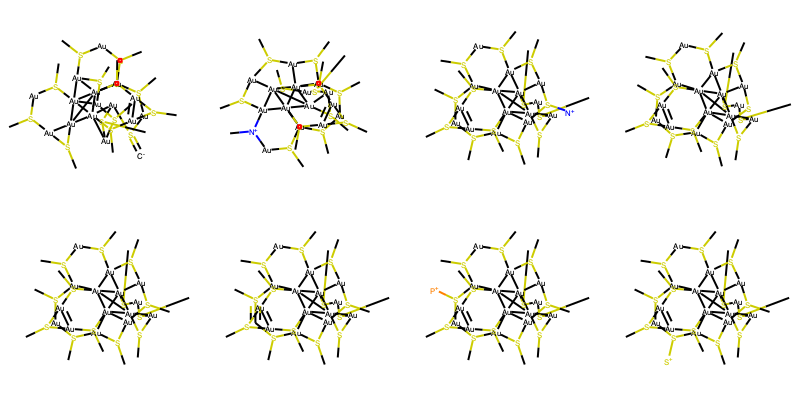

In [53]:
img=Draw.MolsToGridImage(mols_8[:8],molsPerRow=4,subImgSize=(200,200))    
img

In [54]:
Chem.MolToSmiles(mols_8[0])

'[C-]=S1[Au][S](C)[Au]2[S](C)[Au][S](C)[Au]34[S](C)[Au]5[S](C)[Au]6[S](C)[Au]1[Au]6178[S](C)[Au]6=[Au]([S]6C)[S](C)[Au]2316[Au]712[S](C)[Au]1[S](C)[Au][S](C)[Au]54286'

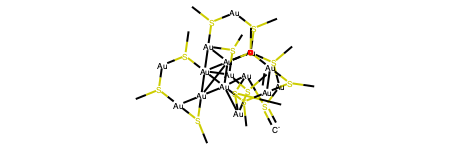

In [55]:
random3 = Chem.MolFromSmiles('[C-]=S1[Au][S](C)[Au]2[S](C)[Au][S](C)[Au]34[S](C)[Au]5[S](C)[Au]6[S](C)[Au]1[Au]6178[S](C)[Au]6=[Au]([S]6C)[S](C)[Au]2316[Au]712[S](C)[Au]1[S](C)[Au][S](C)[Au]54286')
random3

In [56]:
random3.GetNumAtoms()

41

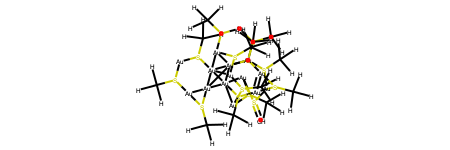

In [58]:
random3_with_hydrogens = Chem.AddHs(random3)
random3_with_hydrogens

In [59]:
random3_with_hydrogens.GetNumAtoms()

77

# GENERATION OF ISOMERS

# Stereoisomers 

In [9]:
from rdkit import Chem
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions
m = Chem.MolFromSmiles('[Au]12[S@@]([Au][S@]([Au]3[Au]4567[Au]89%10[Au]14%11([Au]58%12([Au@]6([S@]([Au]%12[S@]([Au]%11[S@@]2C)C)C)[S@]([Au][S@]3C)C)[S@]([Au][S@]([Au]9[S@@]%10C)C)C)[S@@]([Au]%13=[Au]([S@@]7C)[S@]%13C)C)C)C')
isomers = tuple(EnumerateStereoisomers(m))
len(isomers)

2

In [10]:
 for smi in sorted(Chem.MolToSmiles(x, isomericSmiles=True) for x in isomers):
...     print(smi)

C[S@]1[Au][S@](C)[Au]2345[Au]6[S@@](C)[Au]7[S@@](C)[Au]8[S@](C)[Au][S@@](C)[Au]9[S@@](C)[Au][S@](C)[Au@@]2([S@@]6C)[Au]9326[S@](C)[Au]3=[Au]([S@@]3C)[S@@](C)[Au]8742[Au]562[S@](C)[Au]12
C[S@]1[Au][S@](C)[Au]2345[Au]6[S@@](C)[Au]7[S@@](C)[Au]8[S@](C)[Au][S@@](C)[Au]9[S@@](C)[Au][S@](C)[Au@]2([S@@]6C)[Au]9326[S@](C)[Au]3=[Au]([S@@]3C)[S@@](C)[Au]8742[Au]562[S@](C)[Au]12


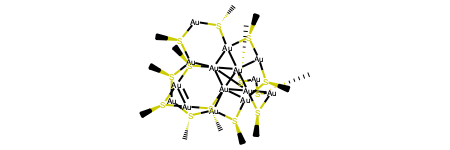

In [11]:
one = Chem.MolFromSmiles('C[S@]1[Au][S@](C)[Au]2345[Au]6[S@@](C)[Au]7[S@@](C)[Au]8[S@](C)[Au][S@@](C)[Au]9[S@@](C)[Au][S@](C)[Au@@]2([S@@]6C)[Au]9326[S@](C)[Au]3=[Au]([S@@]3C)[S@@](C)[Au]8742[Au]562[S@](C)[Au]12')
one

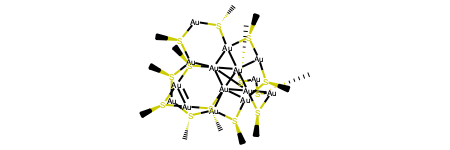

In [12]:
two = Chem.MolFromSmiles('C[S@]1[Au][S@](C)[Au]2345[Au]6[S@@](C)[Au]7[S@@](C)[Au]8[S@](C)[Au][S@@](C)[Au]9[S@@](C)[Au][S@](C)[Au@]2([S@@]6C)[Au]9326[S@](C)[Au]3=[Au]([S@@]3C)[S@@](C)[Au]8742[Au]562[S@](C)[Au]12')
two

In [5]:
 from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1') 
substructure = Chem.MolFromSmiles('C(=O)O') 
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


RDKit WARNING: [16:36:25] Enabling RDKit 2019.09.3 jupyter extensions


In [ ]:
m